In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
application_df.head()

In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

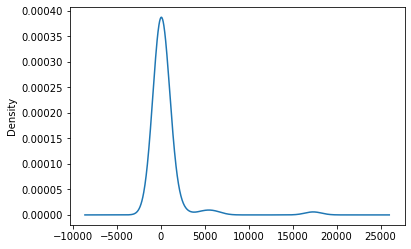

In [9]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\fermi\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

C:\Users\fermi\AppData\Local\Temp\ipykernel_28856\3768494989.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(application_cat, 1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop("IS_SUCCESSFUL",1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\fermi\AppData\Local\Temp\ipykernel_28856\2432014728.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df.drop("IS_SUCCESSFUL",1).values


In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## 1. Adding more neurons to a hidden layer


In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4400      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 9,501
Trainable params: 9,501
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 476us/step - loss: 0.5850 - accuracy: 0.7089
Epoch 2/50
804/804 [==============================] - 0s 470us/step - loss: 0.5563 - accuracy: 0.7291
Epoch 3/50
804/804 [==============================] - 0s 468us/step - loss: 0.5491 - accuracy: 0.7306
Epoch 4/50
804/804 [==============================] - 0s 472us/step - loss: 0.5540 - accuracy: 0.7259
Epoch 5/50
804/804 [==============================] - 0s 464us/step - loss: 0.5456 - accuracy: 0.7342
Epoch 6/50
804/804 [==============================] - 0s 469us/step - loss: 0.5467 - accuracy: 0.7348
Epoch 7/50
804/804 [==============================] - 0s 466us/step - loss: 0.5454 - accuracy: 0.7351
Epoch 8/50
804/804 [==============================] - 0s 459us/step - loss: 0.5472 - accuracy: 0.7325
Epoch 9/50
804/804 [==============================] - 0s 474us/step - loss: 0.5453 - accuracy: 0.7367
Epoch 10/50
804/804 [==============================] - 0s 465us/step - loss: 0.549

In [20]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5638 - accuracy: 0.7252
Loss: 0.5638181567192078, Accuracy: 0.7252478003501892


In [21]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

## 2. Adding more hidden layers

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3520      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 482us/step - loss: 0.5890 - accuracy: 0.7021
Epoch 2/100
804/804 [==============================] - 0s 492us/step - loss: 0.5517 - accuracy: 0.7306
Epoch 3/100
804/804 [==============================] - 0s 482us/step - loss: 0.5510 - accuracy: 0.7336
Epoch 4/100
804/804 [==============================] - 0s 479us/step - loss: 0.5520 - accuracy: 0.7310
Epoch 5/100
804/804 [==============================] - 0s 475us/step - loss: 0.5435 - accuracy: 0.7374
Epoch 6/100
804/804 [==============================] - 0s 476us/step - loss: 0.5473 - accuracy: 0.7340
Epoch 7/100
804/804 [==============================] - 0s 475us/step - loss: 0.5455 - accuracy: 0.7321
Epoch 8/100
804/804 [==============================] - 0s 480us/step - loss: 0.5452 - accuracy: 0.7373
Epoch 9/100
804/804 [==============================] - 0s 480us/step - loss: 0.5471 - accuracy: 0.7324
Epoch 10/100
804/804 [==============================] - 0s 495us/step - l

804/804 [==============================] - 0s 472us/step - loss: 0.5326 - accuracy: 0.7418
Epoch 80/100
804/804 [==============================] - 0s 475us/step - loss: 0.5347 - accuracy: 0.7394
Epoch 81/100
804/804 [==============================] - 0s 472us/step - loss: 0.5349 - accuracy: 0.7412
Epoch 82/100
804/804 [==============================] - 0s 477us/step - loss: 0.5307 - accuracy: 0.7464
Epoch 83/100
804/804 [==============================] - 0s 478us/step - loss: 0.5324 - accuracy: 0.7430
Epoch 84/100
804/804 [==============================] - 0s 473us/step - loss: 0.5294 - accuracy: 0.7436
Epoch 85/100
804/804 [==============================] - 0s 473us/step - loss: 0.5283 - accuracy: 0.7447
Epoch 86/100
804/804 [==============================] - 0s 481us/step - loss: 0.5334 - accuracy: 0.7436
Epoch 87/100
804/804 [==============================] - 0s 477us/step - loss: 0.5343 - accuracy: 0.7436
Epoch 88/100
804/804 [==============================] - 0s 475us/step - loss:

In [25]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5951 - accuracy: 0.7212
Loss: 0.5950756072998047, Accuracy: 0.72116619348526


## 3. Using different activation functions for the hidden layers and reducing number of epochs.

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="tanh", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))



# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 80)                3520      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)


Epoch 1/50
804/804 [==============================] - 1s 461us/step - loss: 0.5820 - accuracy: 0.7154
Epoch 2/50
804/804 [==============================] - 0s 453us/step - loss: 0.5590 - accuracy: 0.7324
Epoch 3/50
804/804 [==============================] - 0s 452us/step - loss: 0.5506 - accuracy: 0.7336
Epoch 4/50
804/804 [==============================] - 0s 458us/step - loss: 0.5452 - accuracy: 0.7338
Epoch 5/50
804/804 [==============================] - 0s 458us/step - loss: 0.5498 - accuracy: 0.7302
Epoch 6/50
804/804 [==============================] - 0s 450us/step - loss: 0.5442 - accuracy: 0.7354
Epoch 7/50
804/804 [==============================] - 0s 455us/step - loss: 0.5447 - accuracy: 0.7356
Epoch 8/50
804/804 [==============================] - 0s 456us/step - loss: 0.5424 - accuracy: 0.7399
Epoch 9/50
804/804 [==============================] - 0s 452us/step - loss: 0.5442 - accuracy: 0.7345
Epoch 10/50
804/804 [==============================] - 0s 450us/step - loss: 0.545

In [29]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5603 - accuracy: 0.7242
Loss: 0.5603182315826416, Accuracy: 0.7241982221603394
